In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
#merging all data in a single file
files= (file for file in os.listdir("./Sales_data"))
all_month_data = pd.DataFrame()

for file in files :
    df=pd.read_csv("./Sales_data/"+file)
    all_month_data=pd.concat([all_month_data, df])

all_month_data.to_csv("all_month_data.csv",index=False)

In [3]:
all_data=pd.read_csv('all_month_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
#drop all nan rows
df_Nan = all_data[all_data.isna().any(axis=1)]
df_Nan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
all_data=all_data.dropna(how='all')

In [6]:
all_data=all_data[all_data['Order Date'].str[0:2]!="Or"]


In [7]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [8]:
all_data["Month"]=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [9]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [10]:
#Adding a city column

In [11]:
all_data['City']=all_data['Purchase Address'].apply(lambda x: x.split(',')[1] +'-'+ x.split(',')[2].split(' ')[1]) #**
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas-TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston-MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles-CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles-CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles-CA


In [12]:
# all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])    #converting data to int
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])    #converting data to int
all_data['Month']=pd.to_numeric(all_data['Month'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas-TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston-MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles-CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles-CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles-CA


In [13]:
result= all_data.groupby('Month').sum()

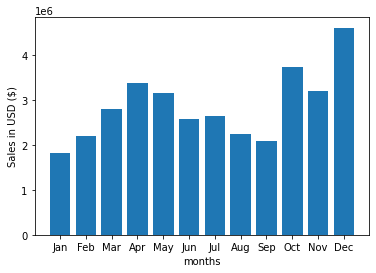

In [14]:
import matplotlib.pyplot as plt
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months= range(1,13)
# k=round(result['Sales'].max())
# print(k)
# USD=range(0,k)
plt.bar(months,result['Sales'])
plt.xticks(months,month)
# plt.yticks(USD,USD)
plt.ylabel('Sales in USD ($)')
plt.xlabel('months')
plt.show()

In [15]:
#which is the city with highest Sells

In [16]:
result= all_data.groupby('City').sum()

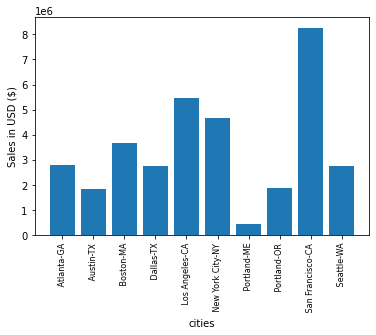

In [17]:
cities=[city for city,df in all_data.groupby('City')]

plt.bar(cities,result['Sales'])
plt.xticks(cities, rotation='vertical',size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('cities')
plt.show()

In [18]:
#what is best time to display advertisement?

In [19]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data['Hour']=all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas-TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston-MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles-CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles-CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles-CA,9


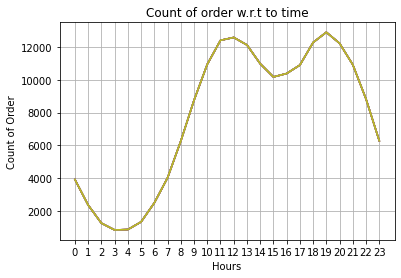

In [24]:
hours=[hour for hour,f in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.title('Count of order w.r.t to time')
plt.xlabel('Hours')
plt.ylabel('Count of Order')
plt.show()

In [ ]:
#What are the Product which are more often sold together

In [36]:
df1=all_data[all_data['Order ID'].duplicated(keep=False)]
df1['Grouped']=df1.groupby('Order ID')['Product'].transform (lambda x:','.join(x))

df1=df1.drop_duplicates(subset=['Order ID','Grouped'],keep='first')
df1.head(20)

C:\Users\ANANDP~1\AppData\Local\Temp/ipykernel_7016/1553736529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped']=df1.groupby('Order ID')['Product'].transform (lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles-CA,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles-CA,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston-MA,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco-CA,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City-NY,11,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,Apple Airpods Headphones,1,150.00,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle-WA,10,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,Bose SoundSport Headphones,1,99.99,2019-04-24 17:15:00,"659 Lincoln St, New York City, NY 10001",4,99.99,New York City-NY,17,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,34in Ultrawide Monitor,1,379.99,2019-04-05 17:38:00,"730 6th St, Austin, TX 73301",4,379.99,Austin-TX,17,"34in Ultrawide Monitor,Google Phone"
225,176774,Lightning Charging Cable,1,14.95,2019-04-25 15:06:00,"372 Church St, Los Angeles, CA 90001",4,14.95,Los Angeles-CA,15,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,iPhone,1,700.00,2019-04-03 07:37:00,"976 Hickory St, Dallas, TX 75001",4,700.00,Dallas-TX,7,"iPhone,Lightning Charging Cable"


In [40]:
from itertools import combinations
from collections import Counter
count = Counter()

for row in df1['Grouped']:
    lst_row=row.split(',')
    
    count.update(Counter(combinations(lst_row, 2)))
    
for key,values in count.most_common(20):
    print(f"{key} : {values}")
    
    
    
    
    

('iPhone', 'Lightning Charging Cable') : 1005
('Google Phone', 'USB-C Charging Cable') : 987
('iPhone', 'Wired Headphones') : 447
('Google Phone', 'Wired Headphones') : 414
('Vareebadd Phone', 'USB-C Charging Cable') : 361
('iPhone', 'Apple Airpods Headphones') : 360
('Google Phone', 'Bose SoundSport Headphones') : 220
('USB-C Charging Cable', 'Wired Headphones') : 160
('Vareebadd Phone', 'Wired Headphones') : 143
('Lightning Charging Cable', 'Wired Headphones') : 92
('Lightning Charging Cable', 'Apple Airpods Headphones') : 81
('Vareebadd Phone', 'Bose SoundSport Headphones') : 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') : 77
('Apple Airpods Headphones', 'Wired Headphones') : 69
('Lightning Charging Cable', 'USB-C Charging Cable') : 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') : 55
('Lightning Charging Cable', 'Lightning Charging Cable') : 54
('Bose SoundSport Headphones', 'Wired Headphones') : 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') : 51
('A

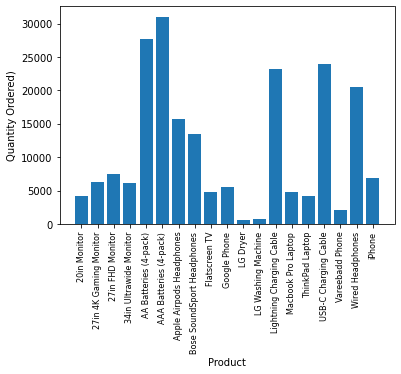

In [49]:
product_group=all_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']

products= [product for product,df in product_group]

plt.bar(products,quantity_ordered)
plt.xticks(products, rotation='vertical',size=8)
plt.ylabel('Quantity Ordered)')
plt.xlabel('Product')
plt.show()

C:\Users\ANANDP~1\AppData\Local\Temp/ipykernel_7016/1520255926.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


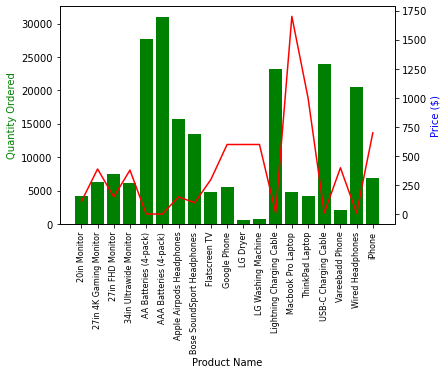

In [52]:
prices=all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()